# Pre-requierments

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('flat.csv', sep='\t')
y = df[['cost']]
X = df[['district', 'total_area', 'repair', 'year', 'distance']]

In [3]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear model

In [4]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import r2_score
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(X_test)
accuracy = r2_score(y_test, predicted)
regressor_name = model.__class__.__name__
print(f'Accuracy for {regressor_name} - {accuracy}')

Accuracy for LinearRegression - 0.6865328725878797


Text(0.5,1,'LinearRegression\nDetermination-0.687')

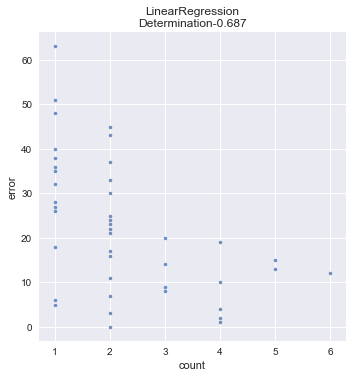

In [5]:
from collections import Counter
errors = np.round(np.abs(1 - predicted / y_test['cost'].values) * 100, 0)
mean_error = np.mean(errors)
max_error = errors.max()
min_error = errors.min()

errors = [x[0] for x in errors]
c = Counter([x for x in errors])
data = {'error': list(c.keys()), 'count': list(c.values())}
df = pd.DataFrame.from_dict(data)
sns.lmplot('count', 'error', data=df, fit_reg=False, markers=["."])
ax = plt.gca()
ax.set_title(f'{regressor_name}\nDetermination-{round(accuracy,3)}')

# More complex model

Accuracy for AdaBoostRegressor - 0.6788864122735636


Text(0.5,1,'AdaBoostRegressor\nDetermination-0.679')

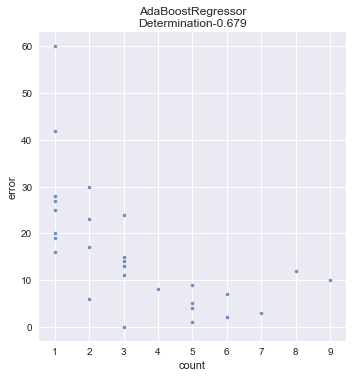

In [6]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
model = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0)
model.fit(x_train, y_train)
predicted = model.predict(X_test)
accuracy = r2_score(y_test, predicted)
regressor_name = model.__class__.__name__
print(f'Accuracy for {regressor_name} - {accuracy}')

errors = np.round(np.abs(1 - predicted / y_test['cost'].values) * 100, 0)
mean_error = np.mean(errors)
max_error = errors.max()
min_error = errors.min()
c = Counter([x for x in errors])
data = {'error': list(c.keys()), 'count': list(c.values())}
df = pd.DataFrame.from_dict(data)
sns.lmplot('count', 'error', data=df, fit_reg=False, markers=["."])
ax = plt.gca()
ax.set_title(f'{regressor_name}\nDetermination-{round(accuracy,3)}')

# Popular model

Accuracy for XGBRegressor - 0.6958413104623966


Text(0.5,1,'XGBRegressor\nDetermination-0.696')

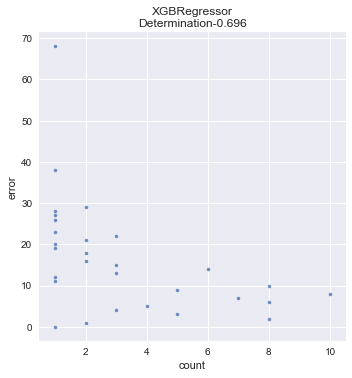

In [7]:
import xgboost as xgb
model = xgb.XGBRegressor(random_state=0)
model.fit(x_train, y_train)
predicted = model.predict(X_test)
accuracy = r2_score(y_test, predicted)
regressor_name = model.__class__.__name__
print(f'Accuracy for {regressor_name} - {accuracy}')
errors = np.round(np.abs(1 - predicted / y_test['cost'].values) * 100, 0)
mean_error = np.mean(errors)
max_error = errors.max()
min_error = errors.min()
c = Counter([x for x in errors])
data = {'error': list(c.keys()), 'count': list(c.values())}
df = pd.DataFrame.from_dict(data)
sns.lmplot('count', 'error', data=df, fit_reg=False, markers=["."])
ax = plt.gca()
ax.set_title(f'{regressor_name}\nDetermination-{round(accuracy,3)}')

# From Russia with Love

Accuracy for CatBoostRegressor - 0.6990870875803248


Text(0.5,1,'CatBoostRegressor\nDetermination-0.699')

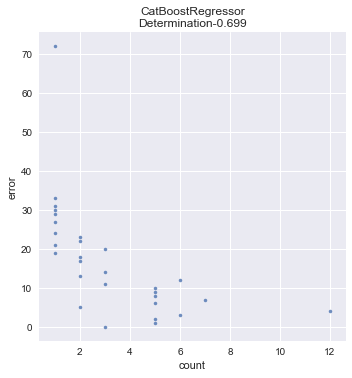

In [8]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(verbose=False, random_state=0)
model.fit(x_train, y_train)
predicted = model.predict(X_test)
accuracy = r2_score(y_test, predicted)
regressor_name = model.__class__.__name__
print(f'Accuracy for {regressor_name} - {accuracy}')
errors = np.round(np.abs(1 - predicted / y_test['cost'].values) * 100, 0)
mean_error = np.mean(errors)
max_error = errors.max()
min_error = errors.min()
c = Counter([x for x in errors])
data = {'error': list(c.keys()), 'count': list(c.values())}
df = pd.DataFrame.from_dict(data)
sns.lmplot('count', 'error', data=df, fit_reg=False, markers=["."])
ax = plt.gca()
ax.set_title(f'{regressor_name}\nDetermination-{round(accuracy,3)}')

# Cross-validation

In [9]:
from sklearn.model_selection import  KFold
cat = CatBoostRegressor(verbose=False, random_state=0)
xgbtree = xgb.XGBRegressor(random_state=0)
regr = linear_model.LinearRegression()
adaboost = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0)
for model in [regr, cat, xgbtree, adaboost]:
    regressor_name = model.__class__.__name__
    fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scores_on_this_split = cross_val_score(estimator=model, X=x_train, y=y_train, cv=fold, scoring='r2')
    accuracy = scores_on_this_split.mean()
    print(f'Accuracy for {regressor_name} - {accuracy}')

Accuracy for LinearRegression - 0.6939594465172012
Accuracy for CatBoostRegressor - 0.7439838443789393
Accuracy for XGBRegressor - 0.7212568562820845
Accuracy for AdaBoostRegressor - 0.6924071663923113
